# Project 3

Ben Heinze (BH), Braxton McCormack (BM), Michael Hagin (MH)

---

### Information:

- [Staglog German Credit Dataset](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)
- [ucimlrepo Documentation](https://github.com/uci-ml-repo/ucimlrepo)
- 
### Prerequisites:

- `pip install ucimlrepo`: Install module to import dataset.

### Import Dataset: (MH)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset (as pandas dataframe)
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 

y = statlog_german_credit_data.data.targets 
  
# metadata 
# print(statlog_german_credit_data.metadata) 
  
# variable information 
# print(statlog_german_credit_data.variables) 

## Part 1 (MH)

---

We are interested in this Credit Data dataset because it looks like there will be clear clusters in the 
data and the type of data is something that can be clearly applied to the real world. There are seven
numerical attributes and 14 categorical attributes. Luckily, there are no missing values. We expect 
clusters to be present in the data based on information in the dataset like credit amount and installment
rate in percentage of disposable income. Attributes like those will probably play a part in how clusters
present in this dataset. Finding clusters in this dataset might be helpful because it can give us 
information on how people of various ages, salaries, and other factors could behave differently in 
situations that have to do with money/credit cards. This information may be used by groups like credit 
card companies to determine whether or not to accept a credit card application coming from someone who
matches the demographics captured in this dataset. We expect to see 2-4 clusters because in the in-class 
example in a lecture a couple weeks ago, there was a graph of the number of graphs with x-number of 
clusters. On that graph, the most common number of clusters in graphs were around 2-4. We expect the
clusters to follow the distribution of credit scores, where most of the population has a credit score
in the 700 range, and the other credit scores are less common.

## Part 2

---
- Exists in `python.py`
- K-Means (BH)
- DBSCAN (BM)
  
Added code below as Gradescope has portions to mark on the report for the code.

In [ ]:
# Please do not change function names and number of parameters.
# Please check the assignment requirements what function should return.
import random
import numpy as np


# Ben Heinze
def k_means_clustering(data_matrix, k, epsilon):
    # 1) randomly place k means, but she gives us initial centroid locations:
    mini = np.min(data_matrix) # gets min value
    maxi = np.max(data_matrix) # gets max value
    k_means = []
    # Loops through correct number of means and generates random values for them
    for _ in range(k):
        mean = []
        for _ in data_matrix[0]:
            mean.append(float(random.uniform(mini, maxi)))
        k_means.append(mean)
    # Converts generated values into a numpy array
    k_means = np.array(k_means)
    # 1.2) get the current k_means average
    currentMeanAverage = np.average(k_means)
    while True:
        # 2) For each data point, assign that point to the nearest Centroid
        # ==================================================================================================================
        # 2.1) create empty matrix to store each point's centroid assignment (0 being fist centroid, 1 being second)
        clusterIndexes = np.zeros((len(data_matrix),1)) # same size as data matrix
        # 2.2) Find the shortest centroid and assign point to that index
        for pointIndex, point in enumerate(data_matrix, 0):
            shortestDist = float('inf')
            # loops through every centroid then assigns the closest centroid to shortestDist
            for centroidIndex, center in enumerate(k_means, 0): # index stores which index of centroid that point is-
                # -closest to

                # calculating Euclidean distance using linalg.norm()
                newDist = np.linalg.norm(point - center)
                # if distance from this centroid is shorter than current, replace current
                if newDist < shortestDist:
                    shortestDist = newDist
                    clusterIndexes[pointIndex] = centroidIndex
        print(f"Cluster assignments: {clusterIndexes.T}") # .T transposes it so it prints horizontally instead of
        # vertically

        # 3) Recalculate Centroids based on current cluster assignments
        # ==================================================================================================================
        # 3.1) Finds every point in single cluster
        for clusterIndex in range(k):
            newMean = np.copy(k_means[clusterIndex])
            pointsInCluster = []
            # if the assignment of the datapoint and the cluster index match, store the point
            for point, assignment in zip(data_matrix, clusterIndexes):
                if clusterIndex == assignment:
                    pointsInCluster.append(point)

            # iterate through every col, take mean, then reassign to the original k-mean
            for i in range(len(k_means[0])):
                col = [p[i] for p in pointsInCluster]
                if sum(col) != 0:
                    mean = sum(col) / len(pointsInCluster)
                else:
                    mean = 0
                newMean[i] = mean
            k_means[clusterIndex] = newMean
        newMeanAverage = np.average(k_means)
        # Breaks if the change in averaages is less than epsilon
        if (currentMeanAverage - newMeanAverage) < epsilon:
            break
        else:
            print("nice")
            currentMeanAverage = newMeanAverage
    print(f"K-Means:\n{k_means}")
    print(f"Cluster assignments:\n {clusterIndexes.T}")

# Braxton McCormack
def dbscan_clustering(data_matrix, minpts, epsilon):
    n_points = len(data_matrix)
    labels = -1 * np.ones(n_points)  # Initialize all labels as -1 (noise points)
    
    def neighbors(point_idx):
        """Calculate neighbors within epsilon distance."""
        return np.where(np.linalg.norm(data_matrix - data_matrix[point_idx], axis=1) <= epsilon)[0]
    
    cluster_id = 0
    for point_idx in range(n_points):
        if labels[point_idx] != -1:
            continue  # Point already processed
        
        # Find all points within the epsilon radius
        point_neighbors = neighbors(point_idx)
        
        # Not enough points to form a core point
        if len(point_neighbors) < minpts:
            labels[point_idx] = -1  # Label as noise (unnecessary as it's initialized to -1)
        else:
            # Current point is a core point
            labels[point_idx] = cluster_id  # Assign to a new cluster
            i = 0
            while i < len(point_neighbors):  # Process every point in the neighborhood
                neighbor_idx = point_neighbors[i]
                if labels[neighbor_idx] == -1:  # Noise point becomes border point
                    labels[neighbor_idx] = cluster_id
                elif labels[neighbor_idx] != -1:  # Already processed and labeled
                    i += 1
                    continue
                else:  # New point found
                    labels[neighbor_idx] = cluster_id
                    new_neighbors = neighbors(neighbor_idx)
                    if len(new_neighbors) >= minpts:  # New core point
                        point_neighbors = np.concatenate([point_neighbors, new_neighbors])
                i += 1
            cluster_id += 1  # Increment for the next cluster
            
    return labels

# Braxton McCormack
def compute_clustering_precision(true_labels, cluster_labels):
    from collections import Counter

    # Check if the input lists have the same length
    if len(true_labels) != len(cluster_labels):
        raise ValueError("The length of true_labels and cluster_labels must be the same.")

    # Mapping from cluster label to true labels in that cluster
    cluster_to_true_labels = {}
    for true_label, cluster_label in zip(true_labels, cluster_labels):
        if cluster_label not in cluster_to_true_labels:
            cluster_to_true_labels[cluster_label] = []
        cluster_to_true_labels[cluster_label].append(true_label)

    # Calculate precision for each cluster
    total_correct = 0
    total_points = 0
    for cluster, labels in cluster_to_true_labels.items():
        if cluster == -1:  # Skip noise points if using DBSCAN or similar
            continue
        label_count = Counter(labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]
        total_correct += most_common_count
        total_points += len(labels)

    # Overall precision is the sum of correct labels divided by total labels (excluding noise points)
    precision = total_correct / total_points if total_points > 0 else 0
    return precision


def main():
    pass

main()

## Part 3

---

### Part 3.0: Preprocess Data (BH)

Our dataset has seven numerical attributes and thirteen categorical/binary attributes. Since scaling affects how principal components are generated, we need to standardize the data. To do that, first we need to separate the numerical-typed attributes and the categorical/binary-typed attributes. These are separated because they require different preprossessing algorithms. Numerical-typed attributes will be subjected to a standard scale while categorical/binary will be subjected to one-hot encoding. It is important that we do not apply standard scaling on one-hot encoding as it could be detrimental to the values assigned by one-hot encoding. 

In [2]:
### Step 1: Separate numerical and categorical/binary
 # numerical attributes
numerical = X.drop(['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7','Attribute9','Attribute10','Attribute12','Attribute14','Attribute15','Attribute17','Attribute19', 'Attribute20'], axis=1)
 # categorical/binary attributes
categorical = X.drop(['Attribute2','Attribute5','Attribute8','Attribute11','Attribute13','Attribute16','Attribute18'], axis=1)


### Step 2: Apply Standard Scaler to numerical data
scaler = StandardScaler()
numericalScaled = scaler.fit_transform(numerical) #, columns=numerical.columns


### Step 3: Encode the categorical/binary data with One-Hot
 # creates dictionary of unique labels for every  categorical column
labels = {col: categorical[col].unique() for col in categorical.columns}
 # one-hot encode with column labels
encoder = OneHotEncoder(categories=[labels[col] for col in categorical.columns])
categoricalEncoded = encoder.fit_transform(categorical)


### Step 4: Merge numerical and categorical data into one dataset
processedData = pd.concat([pd.DataFrame(numericalScaled), pd.DataFrame(categoricalEncoded.toarray())], axis=1)
processedData

,0,1,2,3,4,5,6,0,1,2,...,44,45,46,47,48,49,50,51,52,53
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Part 3.1: 2D PCA Implementation and Scatterplot (BH)

There are no clear clusters shown by plotting the first two principal components on a scatterplot, but there appears to be a clear spot where the datapoints are more saturated/denser. By adding transparency to the plot, we can look for and clusters within the denser region, however, nothing notable was revealed from this.

Text(0.5, 1.0, 'Scatterplot of PC1 and PC2')

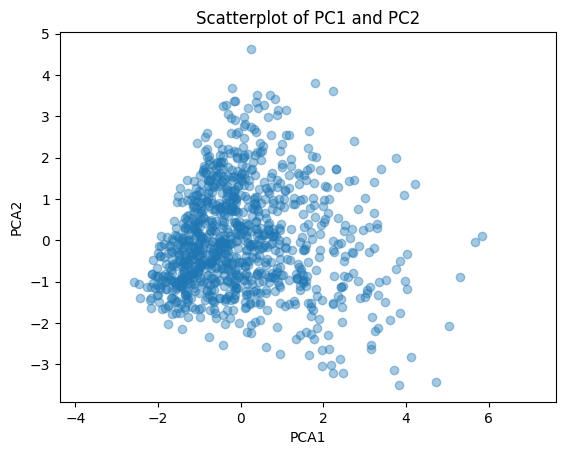

In [3]:
 # Process PCA's into 2 components
pca = PCA(n_components=2)
pcaProcessedData = pca.fit_transform(processedData) #gives me access to .components_ and explained_variance_ratio_

# alter plot size so that legend will not overlap with datapoints
# plt.figure(figsize=(9, 5))
pca1 = pca.components_[0]
pca2 = pca.components_[1]
plt.scatter(pcaProcessedData[:,0], pcaProcessedData[:,1], alpha = .4)

plt.axis('equal');
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Scatterplot of PC1 and PC2")

### Part 3.2: Cumulative Explained Variance (BH)

Analyzing the cumulative explained variance displayed in the chart above shows that two principal components will give us 25% capture of the data. Since the goal it so maximize explained variance capture while minimizing the number of principal components used, we chose to use __20 principal components to capture 84% of the data.__


cumulative sum:
[0.1322585  0.24801981 0.33177757 0.40758325 0.47618293 0.53304299
 0.56869941 0.6013885  0.62679314 0.65151641 0.67484793 0.69723009
 0.71872671 0.73894021 0.7580912  0.77686852 0.79378551 0.8104238
 0.8260434  0.84066438 0.85415441 0.86723535 0.87902365 0.88964189
 0.8995373  0.90860349 0.91740728 0.92589983 0.93361746 0.94119104
 0.94727458 0.95279428 0.95793201 0.96268738 0.96719606 0.9713336
 0.97534502 0.97918705 0.98283452 0.98639456 0.98943874 0.99212497
 0.99443501 0.99618486 0.99757319 0.9985897  0.99936068 1.
 1.         1.         1.         1.         1.        ]


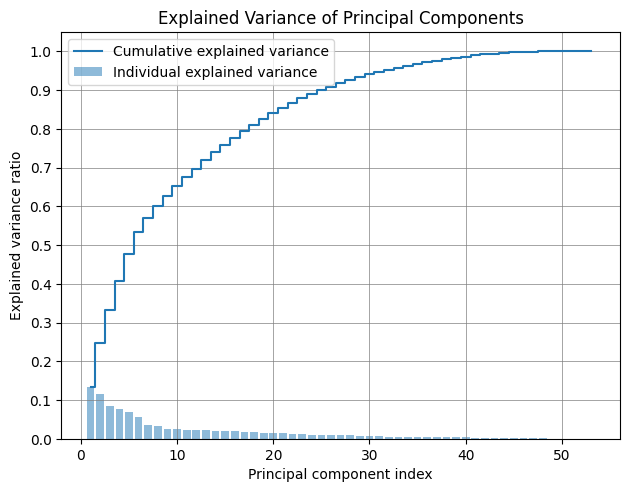

In [4]:
# PCA with 53 components (number of attributes)
pca = PCA(n_components=53)
pcaProcessedData = pca.fit_transform(processedData) #gives me access to .components_ and explained_variance_ratio_

# cumulative explained variance
ratioSum = pca.explained_variance_ratio_.cumsum()
print('\ncumulative sum:')
print(ratioSum)

# plot
plt.bar(range(1,len(ratioSum)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(ratioSum)+1), ratioSum, where='mid',label='Cumulative explained variance')
 # labels
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
 # misc
plt.legend(loc='best')
plt.tight_layout()
 # ticks and intervals
plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(0, 1.05, 0.1))
 # grid details
plt.grid(axis='x', which='major', linestyle='-', color='gray', linewidth=0.5)
plt.grid(axis='y', which='major', linestyle='-', color='gray', linewidth=0.5)
plt.title('Explained Variance of Principal Components')
plt.show()

### Part 3.3: (BM)

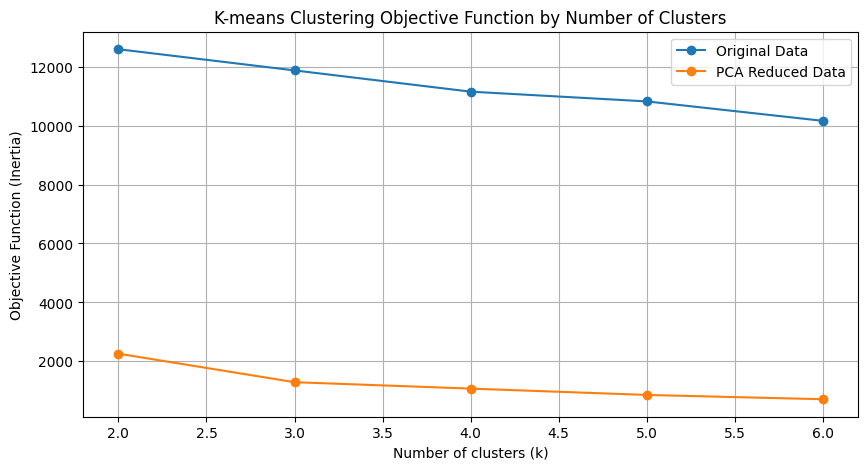

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Process PCA's into 2 components for dimensionality reduction
pca = PCA(n_components=2)
pcaProcessedData = pca.fit_transform(processedData)

# Define the range of k values to test
k_values = [2, 3, 4, 5, 6]
objective_scores_original = []
objective_scores_reduced = []

# Apply k-means to original data with different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit(processedData)
    objective_scores_original.append(kmeans.inertia_)

    # Apply k-means to reduced dimensionality data
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    clusters_pca = kmeans_pca.fit(pcaProcessedData)
    objective_scores_reduced.append(kmeans_pca.inertia_)

# Plotting the objective function values
plt.figure(figsize=(10, 5))
plt.plot(k_values, objective_scores_original, label='Original Data', marker='o')
plt.plot(k_values, objective_scores_reduced, label='PCA Reduced Data', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Objective Function (Inertia)')
plt.title('K-means Clustering Objective Function by Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

### Part 3.4: (BM)

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assume 'processedData' is your original dataset
# Reduce dimensions with PCA
pca = PCA(n_components=2)
pcaProcessedData = pca.fit_transform(processedData)

# Define ranges for DBSCAN parameters
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]  # varied values for epsilon
minpts_values = [3, 5, 10, 15, 20]  # varied values for minpts

# Prepare to collect results
results_original = []
results_reduced = []

# Experiment with minpts, keeping epsilon fixed
fixed_epsilon = 0.3  # Keeping a fixed epsilon for the first experiment
for minpts in minpts_values:
    dbscan_original = DBSCAN(eps=fixed_epsilon, min_samples=minpts).fit(processedData)
    num_clusters_original = len(set(dbscan_original.labels_)) - (1 if -1 in dbscan_original.labels_ else 0)
    
    dbscan_reduced = DBSCAN(eps=fixed_epsilon, min_samples=minpts).fit(pcaProcessedData)
    num_clusters_reduced = len(set(dbscan_reduced.labels_)) - (1 if -1 in dbscan_reduced.labels_ else 0)
    
    results_original.append((minpts, fixed_epsilon, num_clusters_original))
    results_reduced.append((minpts, fixed_epsilon, num_clusters_reduced))

# Experiment with epsilon, keeping minpts fixed
fixed_minpts = 5  # Keeping a fixed minpts for the second experiment
for epsilon in epsilons:
    dbscan_original = DBSCAN(eps=epsilon, min_samples=fixed_minpts).fit(processedData)
    num_clusters_original = len(set(dbscan_original.labels_)) - (1 if -1 in dbscan_original.labels_ else 0)
    
    dbscan_reduced = DBSCAN(eps=epsilon, min_samples=fixed_minpts).fit(pcaProcessedData)
    num_clusters_reduced = len(set(dbscan_reduced.labels_)) - (1 if -1 in dbscan_reduced.labels_ else 0)
    
    results_original.append((fixed_minpts, epsilon, num_clusters_original))
    results_reduced.append((fixed_minpts, epsilon, num_clusters_reduced))

# Output results
print("Results for Original Data:")
for result in results_original:
    print(f"MinPts: {result[0]}, Epsilon: {result[1]}, Clusters: {result[2]}")

print("\nResults for PCA Reduced Data:")
for result in results_reduced:
    print(f"MinPts: {result[0]}, Epsilon: {result[1]}, Clusters: {result[2]}")

Results for Original Data:
MinPts: 3, Epsilon: 0.3, Clusters: 0
MinPts: 5, Epsilon: 0.3, Clusters: 0
MinPts: 10, Epsilon: 0.3, Clusters: 0
MinPts: 15, Epsilon: 0.3, Clusters: 0
MinPts: 20, Epsilon: 0.3, Clusters: 0
MinPts: 5, Epsilon: 0.1, Clusters: 0
MinPts: 5, Epsilon: 0.2, Clusters: 0
MinPts: 5, Epsilon: 0.3, Clusters: 0
MinPts: 5, Epsilon: 0.4, Clusters: 0
MinPts: 5, Epsilon: 0.5, Clusters: 0

Results for PCA Reduced Data:
MinPts: 3, Epsilon: 0.3, Clusters: 5
MinPts: 5, Epsilon: 0.3, Clusters: 8
MinPts: 10, Epsilon: 0.3, Clusters: 1
MinPts: 15, Epsilon: 0.3, Clusters: 2
MinPts: 20, Epsilon: 0.3, Clusters: 1
MinPts: 5, Epsilon: 0.1, Clusters: 36
MinPts: 5, Epsilon: 0.2, Clusters: 8
MinPts: 5, Epsilon: 0.3, Clusters: 8
MinPts: 5, Epsilon: 0.4, Clusters: 2
MinPts: 5, Epsilon: 0.5, Clusters: 1
